# Notebook 1 - EDA, Linear Reg

* Running imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# DATA CLEANING:

* Importing the data and renaming columns for organization

In [11]:
dftrain = pd.read_csv("../data/train.csv")
dftrain.columns = dftrain.columns.str.replace(' ', '_')
dftrain.head()


,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


* Looking for null values

In [12]:
dftrain.dtypes
dftrain.isnull().sum()

Id                0
PID               0
MS_SubClass       0
MS_Zoning         0
Lot_Frontage    330
               ... 
Misc_Val          0
Mo_Sold           0
Yr_Sold           0
Sale_Type         0
SalePrice         0
Length: 81, dtype: int64

* Investingating the data types in the data

In [13]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS_SubClass      2051 non-null   int64  
 3   MS_Zoning        2051 non-null   object 
 4   Lot_Frontage     1721 non-null   float64
 5   Lot_Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot_Shape        2051 non-null   object 
 9   Land_Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot_Config       2051 non-null   object 
 12  Land_Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition_1      2051 non-null   object 
 15  Condition_2      2051 non-null   object 
 16  Bldg_Type        2051 non-null   object 
 17  House_Style   

- Looking for unique features in possibly unnecessary columns

In [14]:
print(dftrain.Pool_QC.unique())
print(dftrain.Alley.unique())
print(dftrain.Misc_Feature.unique())

[nan 'Fa' 'Gd' 'Ex' 'TA']
[nan 'Pave' 'Grvl']
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']


In [15]:
dftrain['Pool_QC'].fillna(0, inplace = True)
dftrain['Lot_Frontage'].fillna(0, inplace = True)
dftrain['Alley'].fillna(0, inplace = True)
dftrain['Fence'].fillna(0, inplace = True)
dftrain['Misc_Feature'].fillna(0, inplace = True)
dftrain['Overall_Qual'].fillna(0, inplace = True)
dftrain['Year_Built'].fillna(0, inplace = True)
dftrain['Year_Remod/Add'].fillna(0, inplace = True)
dftrain['Mas_Vnr_Area'].fillna(0, inplace = True)
dftrain['Wood_Deck_SF'].fillna(0, inplace = True)
dftrain['Open_Porch_SF'].fillna(0, inplace = True)
dftrain['SalePrice'].fillna(0, inplace = True)



dftrain.head()


,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


# EDA 

* Looking for correlation to begin tackling the problem

In [16]:
dftrain.corr()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.013538,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035808,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.038402,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.242482,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS_SubClass,0.026543,-0.003632,1.000000,-0.216259,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.002763,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot_Frontage,-0.013538,-0.038402,-0.216259,1.000000,0.135586,0.114469,-0.032452,0.020571,0.058942,0.101672,...,0.011388,0.095295,0.009207,0.008076,0.036598,0.092288,0.026066,-0.006382,0.007713,0.181456
Lot_Area,0.032872,0.024135,-0.245484,0.135586,1.000000,0.105824,-0.019185,0.036002,0.050771,0.167520,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall_Qual,-0.061483,-0.265863,0.035763,0.114469,0.105824,1.000000,-0.082770,0.602964,0.584654,0.430041,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall_Cond,-0.026096,0.106861,-0.070141,-0.032452,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.131908,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year_Built,-0.064444,-0.347039,0.035983,0.020571,0.036002,0.602964,-0.370988,1.000000,0.629116,0.320780,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year_Remod/Add,-0.090040,-0.176666,0.044836,0.058942,0.050771,0.584654,0.042614,0.629116,1.000000,0.204234,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas_Vnr_Area,-0.035808,-0.242482,-0.002763,0.101672,0.167520,0.430041,-0.131908,0.320780,0.204234,1.000000,...,0.164006,0.157836,-0.105934,0.011771,0.088207,0.012789,0.079630,-0.003915,-0.017324,0.503579


* Correlation by the target value 'SalePrice'

In [17]:
spcorr = dftrain.corr()['SalePrice']
spcorr

Id                -0.051398
PID               -0.255052
MS_SubClass       -0.087335
Lot_Frontage       0.181456
Lot_Area           0.296566
Overall_Qual       0.800207
Overall_Cond      -0.097019
Year_Built         0.571849
Year_Remod/Add     0.550370
Mas_Vnr_Area       0.503579
BsmtFin_SF_1       0.423519
BsmtFin_SF_2       0.016255
Bsmt_Unf_SF        0.190210
Total_Bsmt_SF      0.628925
1st_Flr_SF         0.618486
2nd_Flr_SF         0.248452
Low_Qual_Fin_SF   -0.041594
Gr_Liv_Area        0.697038
Bsmt_Full_Bath     0.283662
Bsmt_Half_Bath    -0.045328
Full_Bath          0.537969
Half_Bath          0.283001
Bedroom_AbvGr      0.137067
Kitchen_AbvGr     -0.125444
TotRms_AbvGrd      0.504014
Fireplaces         0.471093
Garage_Yr_Blt      0.533922
Garage_Cars        0.648220
Garage_Area        0.650270
Wood_Deck_SF       0.326490
Open_Porch_SF      0.333476
Enclosed_Porch    -0.135656
3Ssn_Porch         0.048732
Screen_Porch       0.134581
Pool_Area          0.023106
Misc_Val          -0

* Visualizing the correlation with heat maps

<AxesSubplot:>

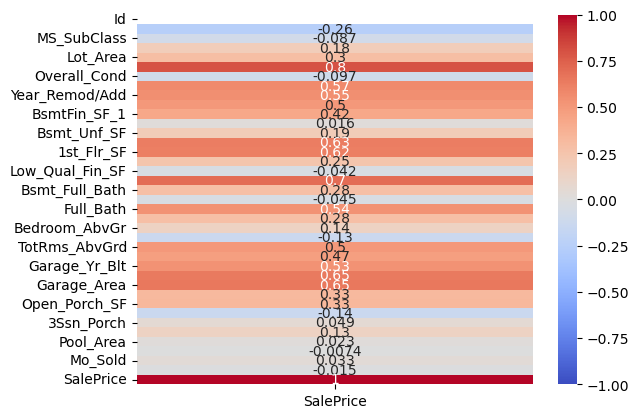

In [18]:
corr = dftrain.corr()[['SalePrice']]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           cmap = 'coolwarm',
           vmin = -1,
           vmax = 1,
           annot = True,
           mask = mask)

In [19]:
dftemp = dftrain[['SalePrice','Overall_Qual','Year_Built', 'Year_Remod/Add', 'Mas_Vnr_Area', 'Wood_Deck_SF', 'Open_Porch_SF']]

<AxesSubplot:>

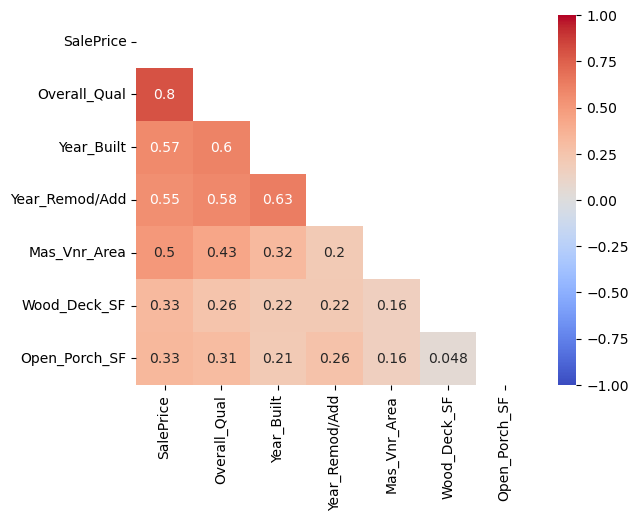

In [20]:
corr = dftemp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           cmap = 'coolwarm',
           vmin = -1,
           vmax = 1,
           annot = True,
           mask = mask)

* Utlizing scatter plots to visualize correlation with specific features and the target variable

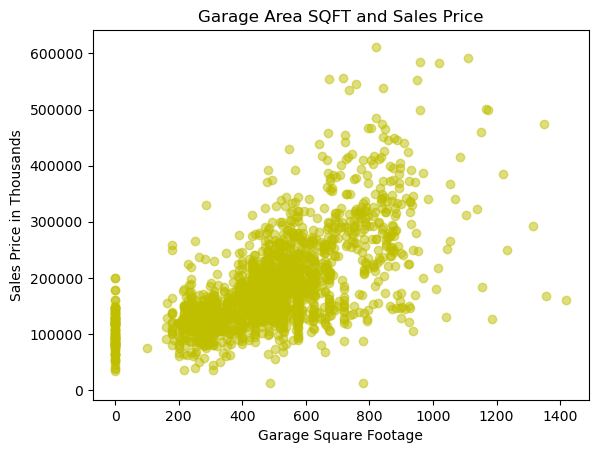

In [21]:
plt.scatter(dftrain['Garage_Area'], dftrain['SalePrice'], color = 'y',  alpha = 0.5);

plt.title('Garage Area SQFT and Sales Price')
plt.xlabel('Garage Square Footage')
plt.ylabel('Sales Price in Thousands')

plt.savefig('../images/garage area and price', bbox_inches = 'tight', dpi = 300)



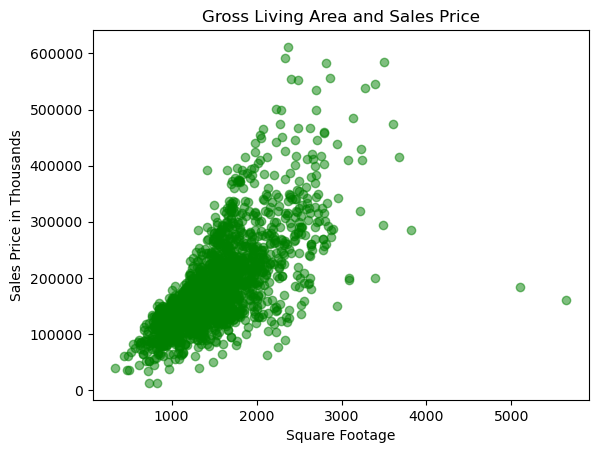

In [22]:
plt.scatter(dftrain['Gr_Liv_Area'], dftrain['SalePrice'], color = 'g',  alpha = 0.5);

plt.title('Gross Living Area and Sales Price')
plt.xlabel('Square Footage')
plt.ylabel('Sales Price in Thousands')

plt.savefig('../images/gross living and price', bbox_inches = 'tight', dpi = 300)

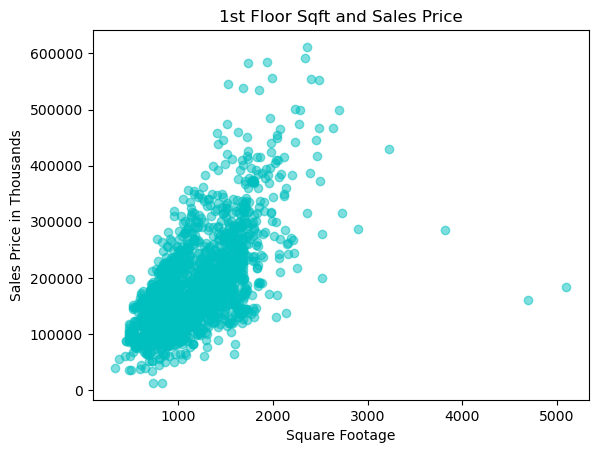

In [23]:
plt.scatter(dftrain['1st_Flr_SF'], dftrain['SalePrice'], color ='c', alpha = 0.5);

plt.title('1st Floor Sqft and Sales Price')
plt.xlabel('Square Footage')
plt.ylabel('Sales Price in Thousands')

plt.savefig('../images/first floor sqft and price')

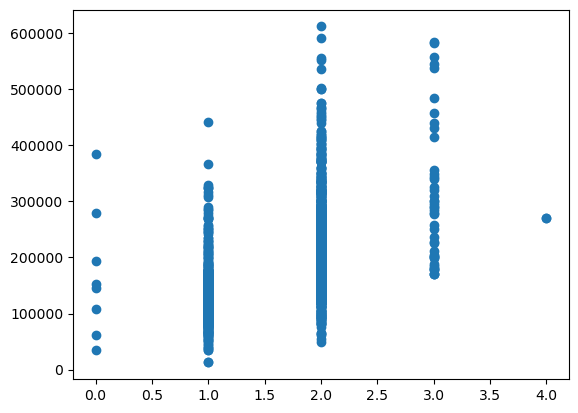

In [24]:
plt.scatter(dftrain['Full_Bath'], dftrain['SalePrice']);

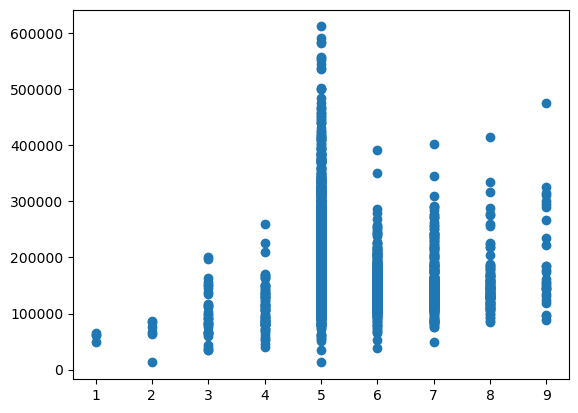

In [25]:
plt.scatter(dftrain['Overall_Cond'], dftrain['SalePrice']);

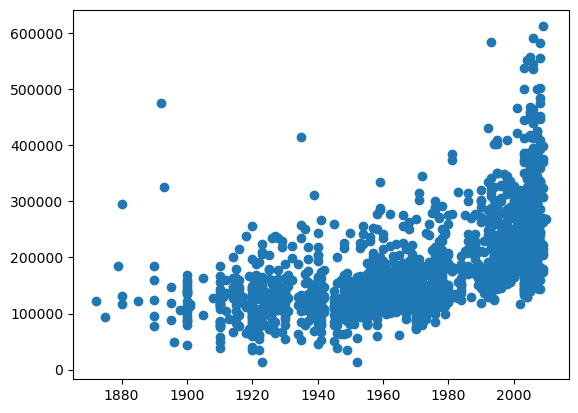

In [26]:
plt.scatter(dftrain['Year_Built'], dftrain['SalePrice']);

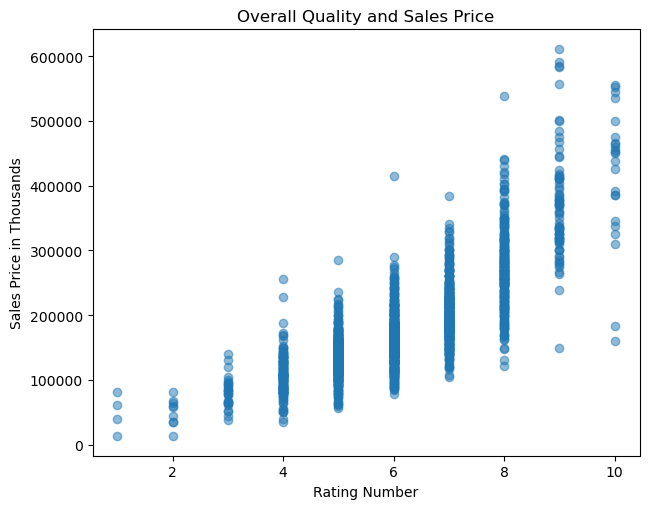

In [27]:
plt.scatter(dftrain['Overall_Qual'], dftrain['SalePrice'], alpha = 0.5);
plt.tight_layout()

plt.title('Overall Quality and Sales Price')
plt.xlabel('Rating Number')
plt.ylabel('Sales Price in Thousands')

plt.savefig('../images/over all quality.jpg', bbox_inches = 'tight', dpi = 300)



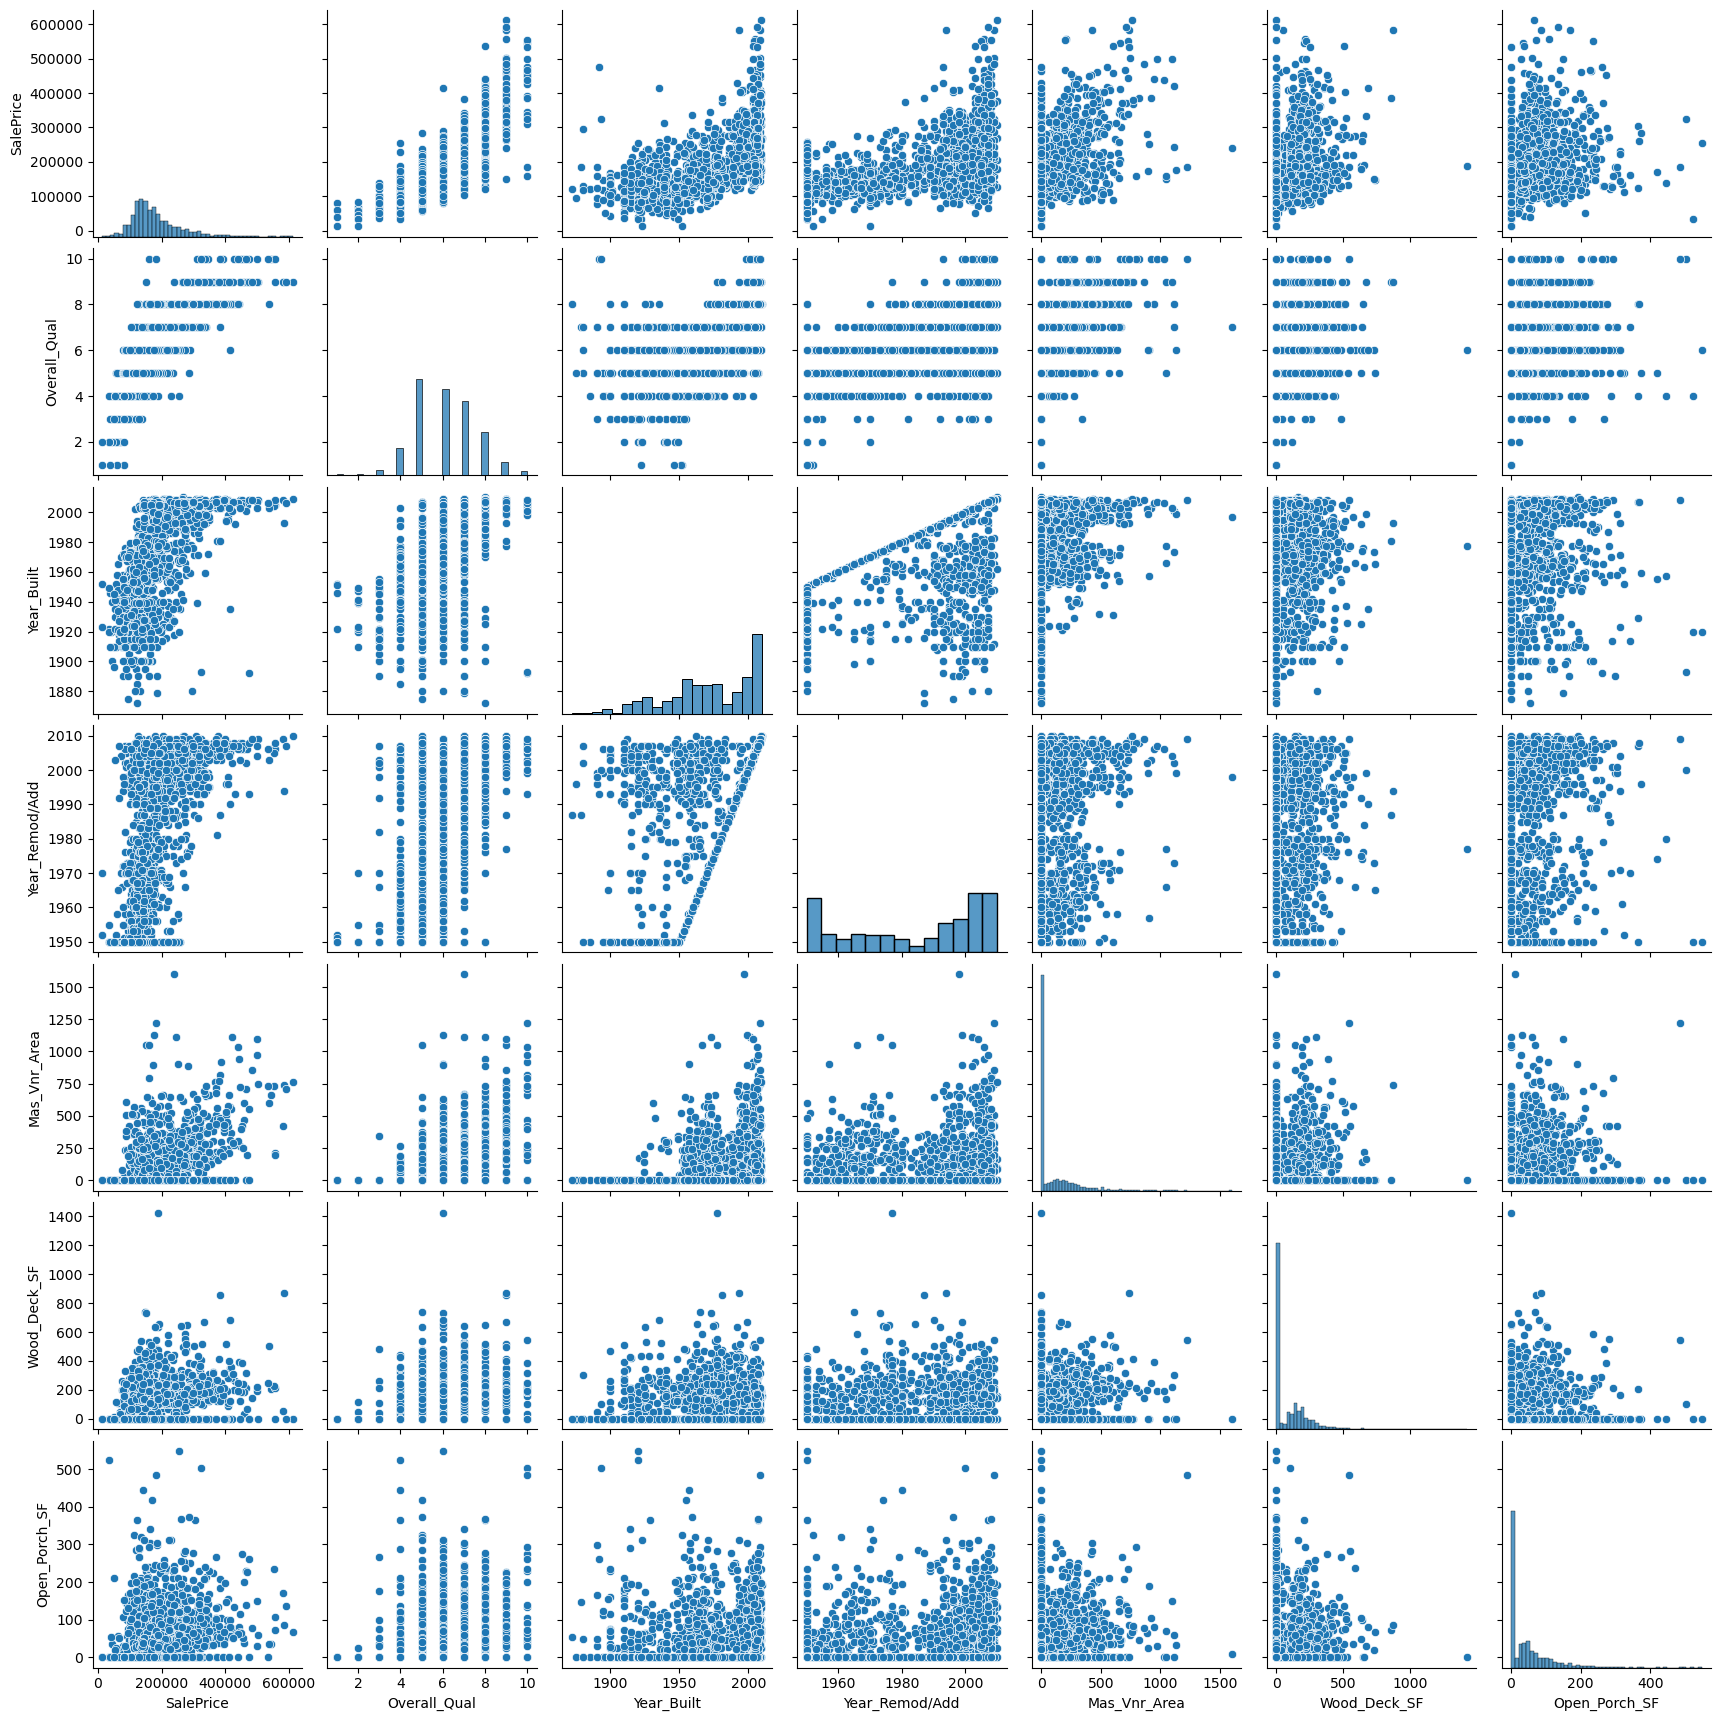

In [28]:
sns.pairplot(dftrain[['SalePrice','Overall_Qual','Year_Built', 'Year_Remod/Add', 'Mas_Vnr_Area', 'Wood_Deck_SF', 'Open_Porch_SF']]);

# Creating Feature Maxtrix and Target Vectors

In [29]:
# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = dftrain[['Overall_Qual','Year_Built', 'Year_Remod/Add', 'Mas_Vnr_Area', 'Wood_Deck_SF', 'Open_Porch_SF']]
X.head()

,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Area,Wood_Deck_SF,Open_Porch_SF
0,6,1976,2005,289.0,0,44
1,7,1996,1997,132.0,0,74
2,5,1953,2007,0.0,0,52
3,5,2006,2007,0.0,100,0
4,6,1900,1993,0.0,0,59


In [32]:
y = dftrain['SalePrice']
y.shape

(2051,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()


,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Area,Wood_Deck_SF,Open_Porch_SF
532,6,1971,1971,302.0,0,44
415,7,1937,1980,0.0,521,0
273,5,1950,2002,0.0,194,0
1460,7,1996,1997,0.0,296,44
250,8,1995,1995,466.0,192,87


In [34]:
lr = LinearRegression()

In [35]:
print(type(lr))

<class 'sklearn.linear_model._base.LinearRegression'>


In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr.coef_

array([31417.67926743,   184.53053278,   357.53613036,    86.97562533,
          60.62043053,    95.35608758])

In [39]:
list(zip(lr.coef_, X_train))

[(31417.679267429787, 'Overall_Qual'),
 (184.5305327797856, 'Year_Built'),
 (357.5361303633723, 'Year_Remod/Add'),
 (86.97562532552024, 'Mas_Vnr_Area'),
 (60.62043053332438, 'Wood_Deck_SF'),
 (95.35608757598362, 'Open_Porch_SF')]

# Running The Model

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([31417.67926743,   184.53053278,   357.53613036,    86.97562533,
          60.62043053,    95.35608758])

In [44]:
model.intercept_

-1102947.5923784766

# Making Predictions

In [45]:
y_preds = model.predict(X_test)
y_preds
# the numbers below are first and last three predicted sales prices

array([125264.53032955, 222213.33744458, 254065.59137959, 142423.40948798,
       214374.27795418, 312077.73385354, 220036.53862585, 297186.62383474,
       172645.2988345 ,  84407.54476557,  95006.11044487, 217341.64481205,
       161018.74290213, 113954.66855465, 144756.74300783,  87342.0511044 ,
       206505.15397788, 213374.82402626, 328611.96947871, 256019.65204703,
       214335.97149368, 223692.42690208, 119301.79703498, 105970.10933642,
       149659.0693871 , 233976.86763306, 193614.14231423, 116049.39705612,
       203447.48802065, 104120.00674057, 284647.48943099, 104772.59740475,
       126608.99941538, 207955.35022428, 219953.71684641, 109126.06758187,
       205230.84129548, 223737.10916863, 349241.98887283, 106742.06430112,
       257292.8354997 , 184673.15011699, 286640.52679188, 200809.98521335,
        91678.58440955, 193163.36343618, 131008.2898554 , 129962.16512173,
       291010.47782856, 123027.1140658 , 342927.73698149, 124088.43563925,
       139000.74757902, 1

In [46]:
type(y_preds)

numpy.ndarray

#  Evaluating The Model

In [47]:
# R2
metrics.r2_score(y_test, y_preds)

0.7302056989843898

In [48]:
model.score(X_test, y_test)

0.7302056989843898

In [49]:
# MSE

metrics.mean_squared_error(y_test, y_preds)

1656543680.3327947

# LINEM


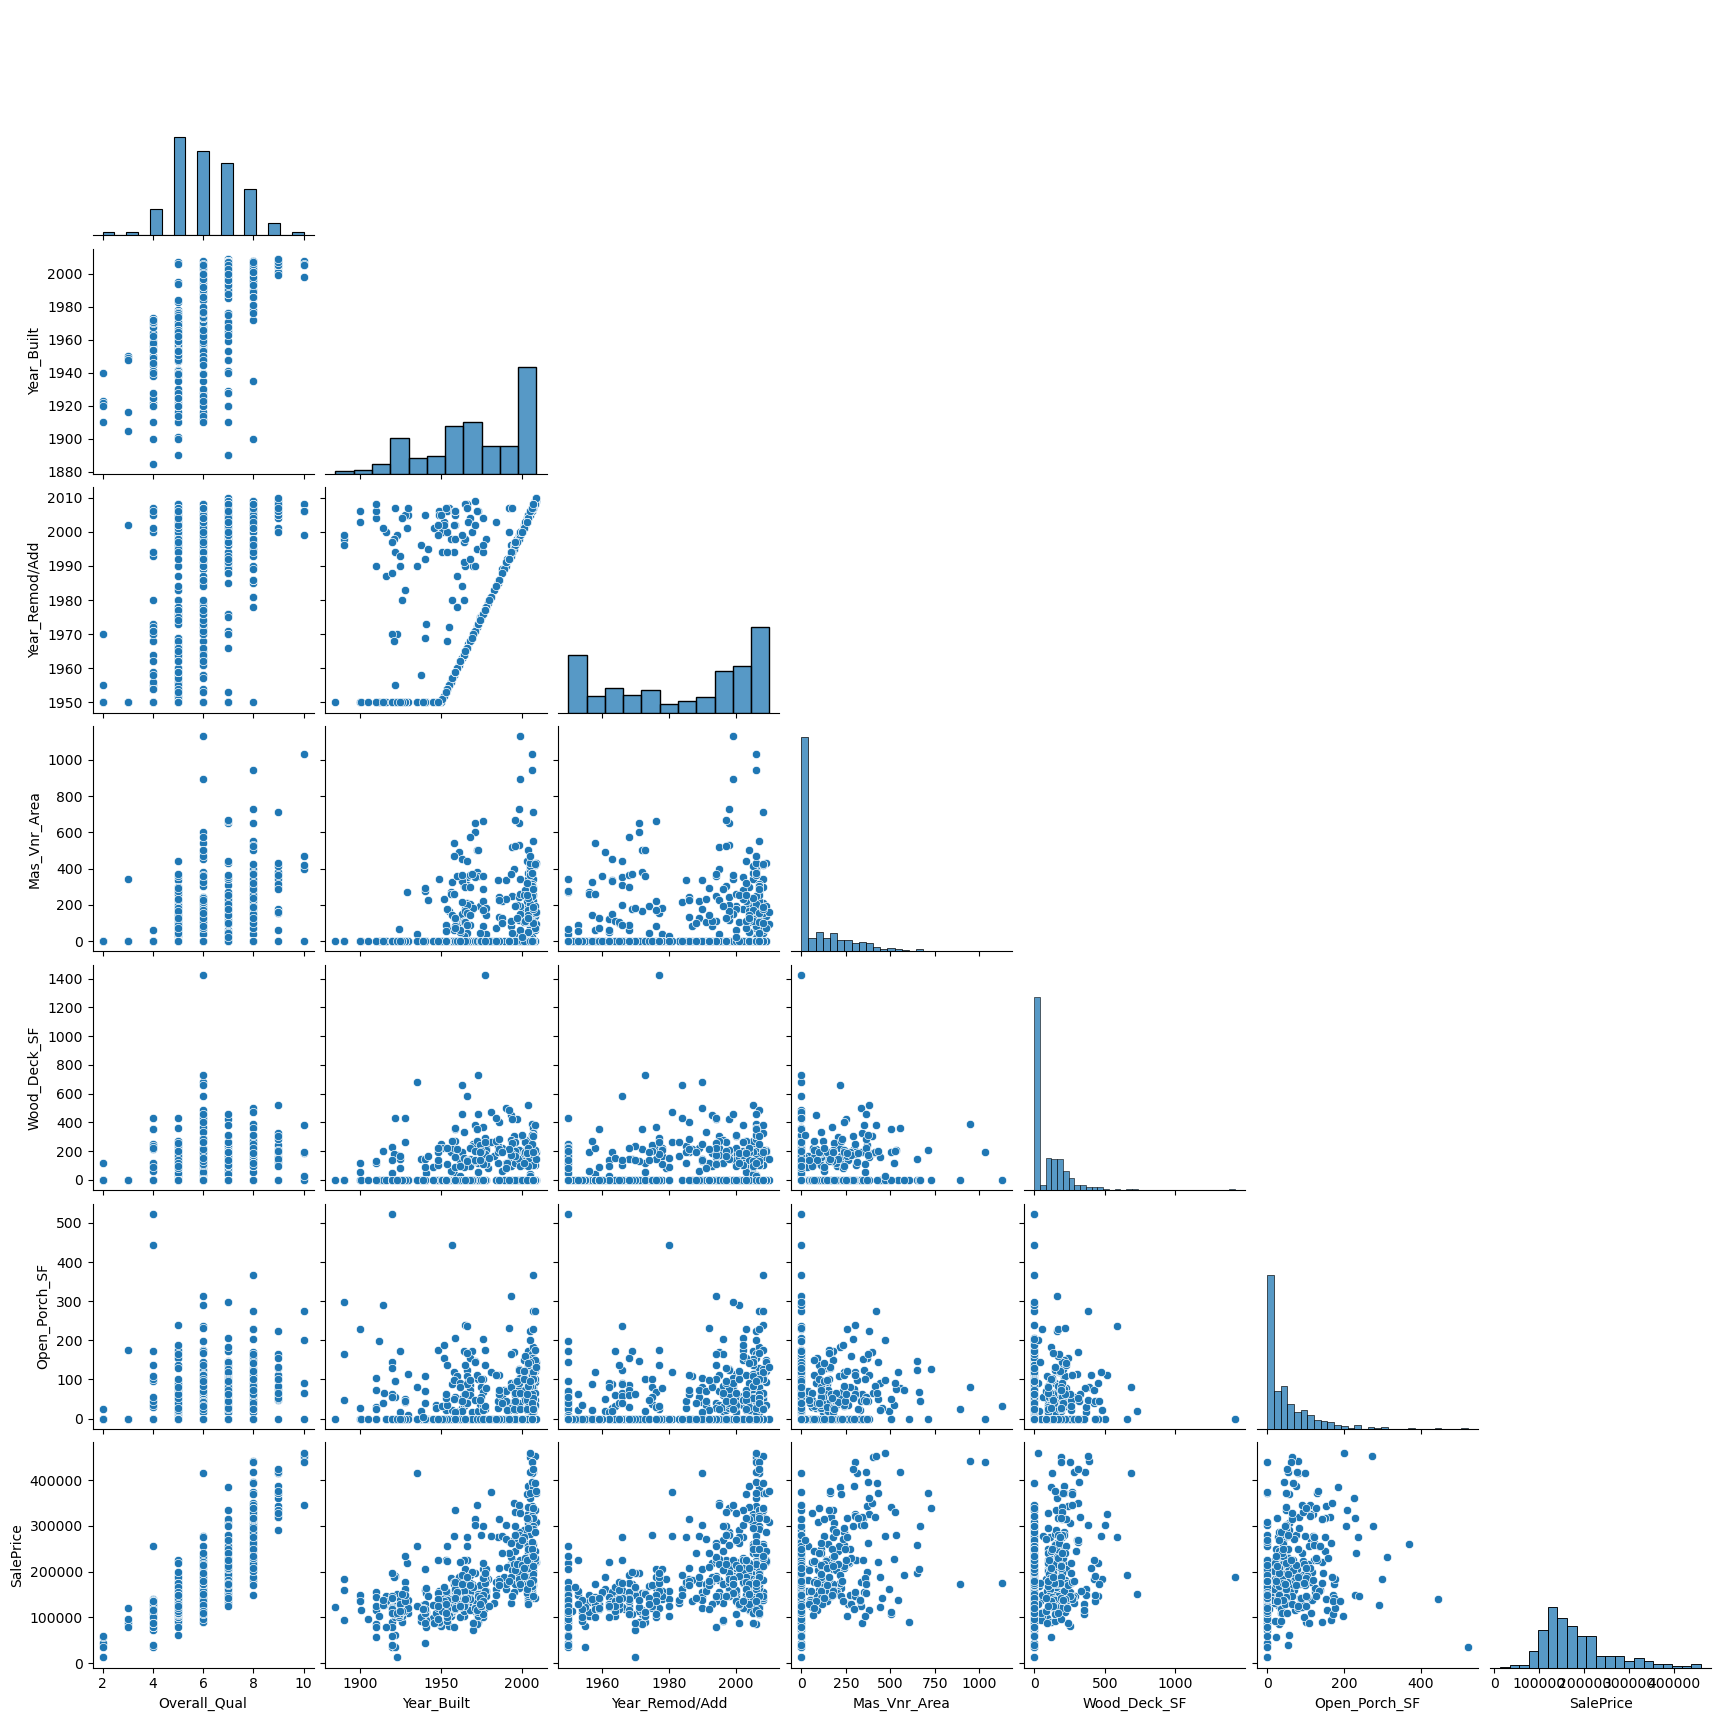

In [50]:
# I 
sns.pairplot(pd.merge(X_test, y_test, left_index = True, right_index = True), corner = True);

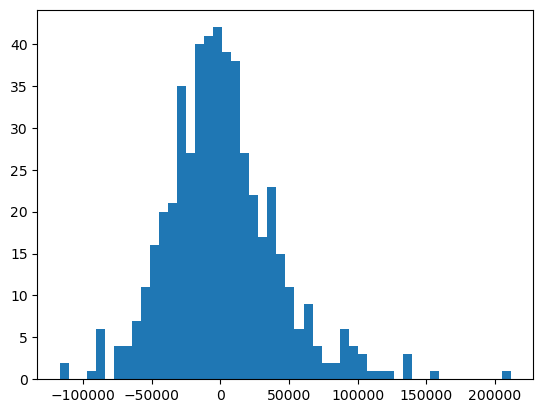

In [51]:
# N
resids = y_test - y_preds

plt.hist(resids, bins = 50);

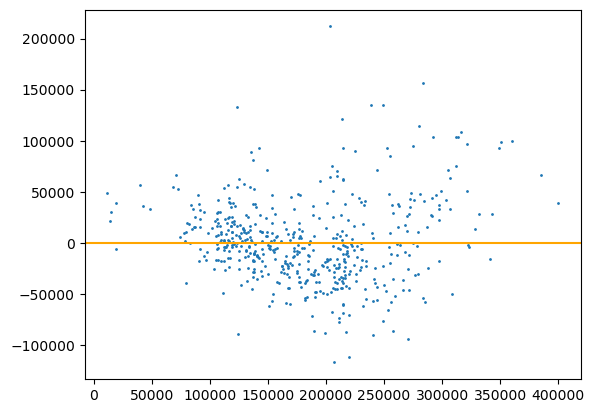

In [52]:
# E: - equal variance - something bad is happening if there is any type of pattern either with data and or risiduals, want it equal on both sides
plt.scatter(y_preds, resids, s = 1)
plt.axhline(0, color = 'orange');

## Model revision with test/train split

after revising the model with a test / train split, there is still a lot of room for improvement in finding which features would most account for variability in sales price holding all else equal. Better feature selection should help with this.
